## Make parametric tests figures 

In [4]:
''' Dependencies '''
from sklearn.decomposition import PCA
from tqdm.auto import tqdm
import warnings
import pandas as pd
import numpy as np
import scipy
import sys
import statsmodels.api as sm
from tqdm import tqdm as pbar

# my scripts
from pyaldata import * 
import preprocess
from utils import *

# Plotting
from IPython.display import display, set_matplotlib_formats, HTML
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.colors
import matplotlib.pyplot as plt
import seaborn as sns

db = '#283db5' # Darkblue default
ddb = '#0c112e'
g = '#767676'
cs = ['#43D789', '#801607', '#8DB8ED', '#94B0B6', '#e42c12', '#005CA8', '#127340', '#111851'] # Line colors
cmap = matplotlib.colors.ListedColormap(['#e4e4e4', 'b', 'g']) # Color for False and True
#cmap = 'Blues'

sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style('ticks', rc={ 'figure.facecolor': 'none', 'axes.facecolor':'none'})
sns.set_context('notebook', rc={'lines.linewidth':1.5})

%config InlineBackend.figure_format = 'retina'

In [5]:
''' Load dictionaries with all test results '''

main_dict = np.load('/Users/Daphne/Data/main_dict.npy', allow_pickle='TRUE').item()
#surr_dict = np.load('/Users/Daphne/Data/surr_dict_20.npy', allow_pickle='TRUE').item()

In [6]:
''' Parameters '''

MONKEY_C = 8
MONKEY_M = 7
ALPHA = 0.001 # significance level
THRESHOLDS_VARE = np.round(np.arange(0.2, 0.95, 0.025), 3)
evar_to_pcs = []
for s in main_dict.keys():
    evar_to_pcs.append([np.argmax(main_dict[s]['model'].explained_variance_ratio_.cumsum() > THRESHOLDS_VARE[i]) for i in range(len(THRESHOLDS_VARE))])

## Make individual violin plots

#TODO after get dimensionality (see `DetermineDimensionality.ipynb`)

In [30]:
# sns.set_theme(style='whitegrid')
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#74E6A0', '#348093', '#0A3C8B'])

# fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))
# #fig.suptitle(f'Monkey {monkey}')
# axs[0].set_title(r'$\bf{Actual}$', loc='left')
# axs[1].set_title(r'$\bf{Control}$', loc='left')
# axs[0].set_ylim([-0.2, 1.2])
# axs[1].set_ylim([-0.2, 1.2])

# sns.violinplot(x='category', y='correlation', data=df_emp, order=['same electrode', 'same array', 'other array'], orient='v', ax=axs[0])
# sns.violinplot(x='category', y='correlation', data=df_con, order=['same electrode', 'same array', 'other array'], saturation=0.3, ax=axs[1])
# sns.despine()

## 1 Make summary plots

### 1.1 Single category

In [74]:
# LOAD NAIVE Shuffling betas
beta0_surr = np.load('/Users/Daphne/Data/Naive surrogates/beta0_surr.npy')
beta1_surr = np.load('/Users/Daphne/Data/Naive surrogates/beta1_surr.npy')
beta2_surr = np.load('/Users/Daphne/Data/Naive surrogates/beta2_surr.npy')

In [75]:
beta0_surr.shape

(50, 30)

In [76]:
b0_mean = np.mean(beta0_surr, axis=0)
b1_mean = np.mean(beta1_surr, axis=0)
b2_mean = np.mean(beta2_surr, axis=0)

b0_std = np.std(beta0_surr, axis=0)
b1_std = np.std(beta1_surr, axis=0)
b2_std = np.std(beta2_surr, axis=0)

In [77]:
# Load t values and pvalues

## MONKEY C

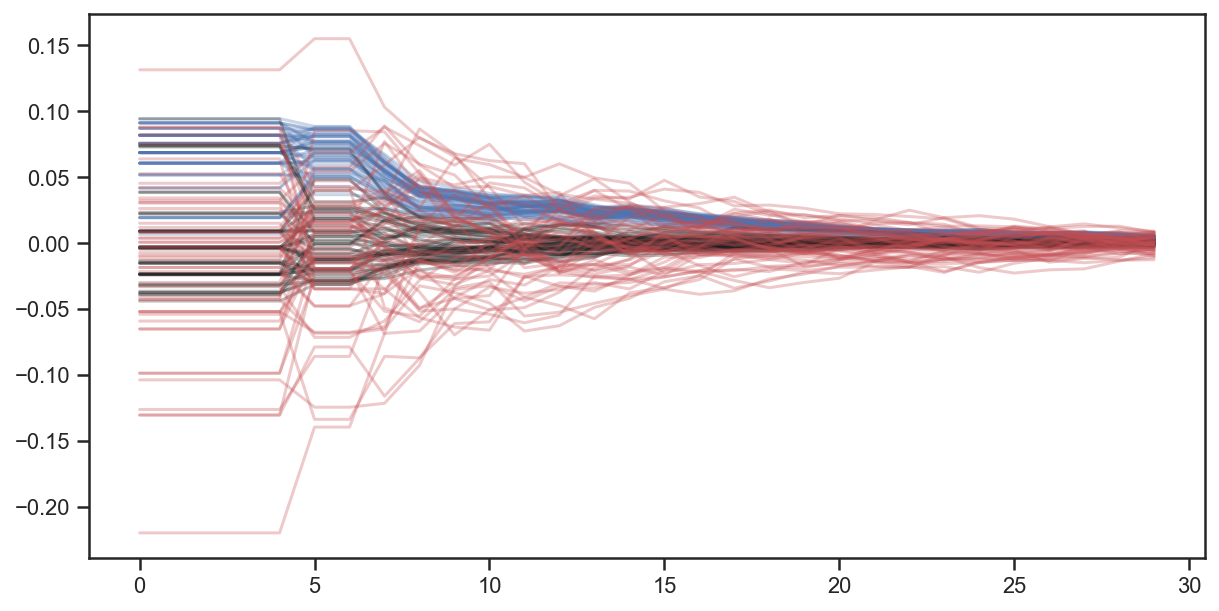

In [82]:
plt.plot(beta0_surr.T, '-b', alpha=0.3);
plt.plot(beta1_surr.T, '-k', alpha=0.3);
plt.plot(beta2_surr.T, '-r', alpha=0.3);

<ErrorbarContainer object of 3 artists>

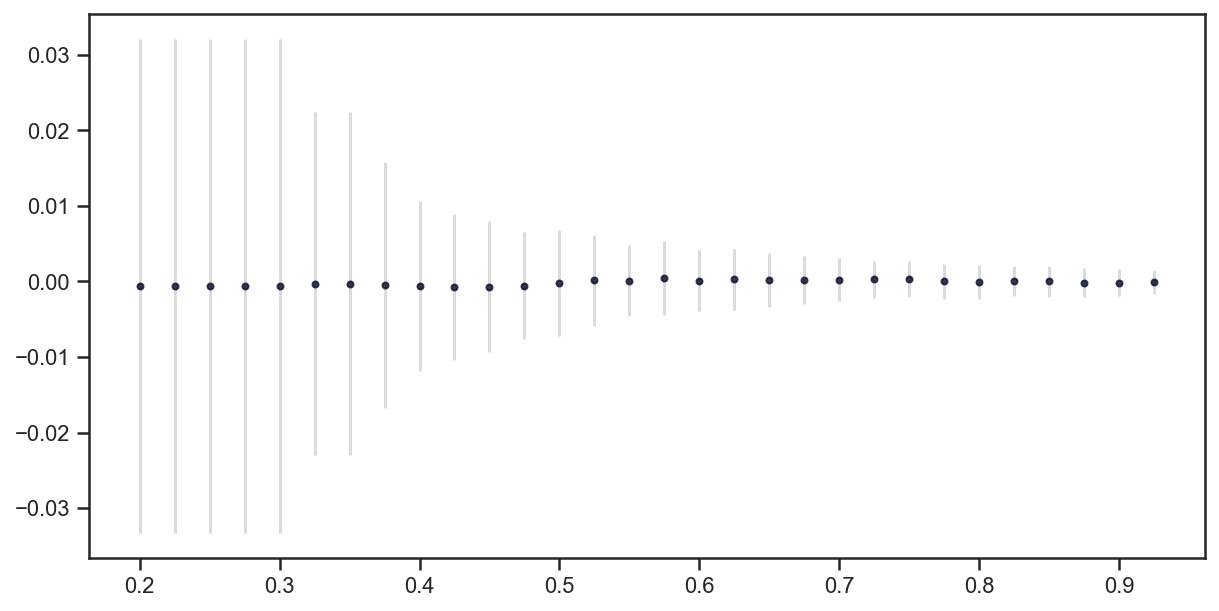

In [81]:
plt.errorbar(THRESHOLDS_VARE, b1_mean, b1_std, marker='.', ecolor='lightgray', linestyle='None', color=ddb, alpha=0.8)

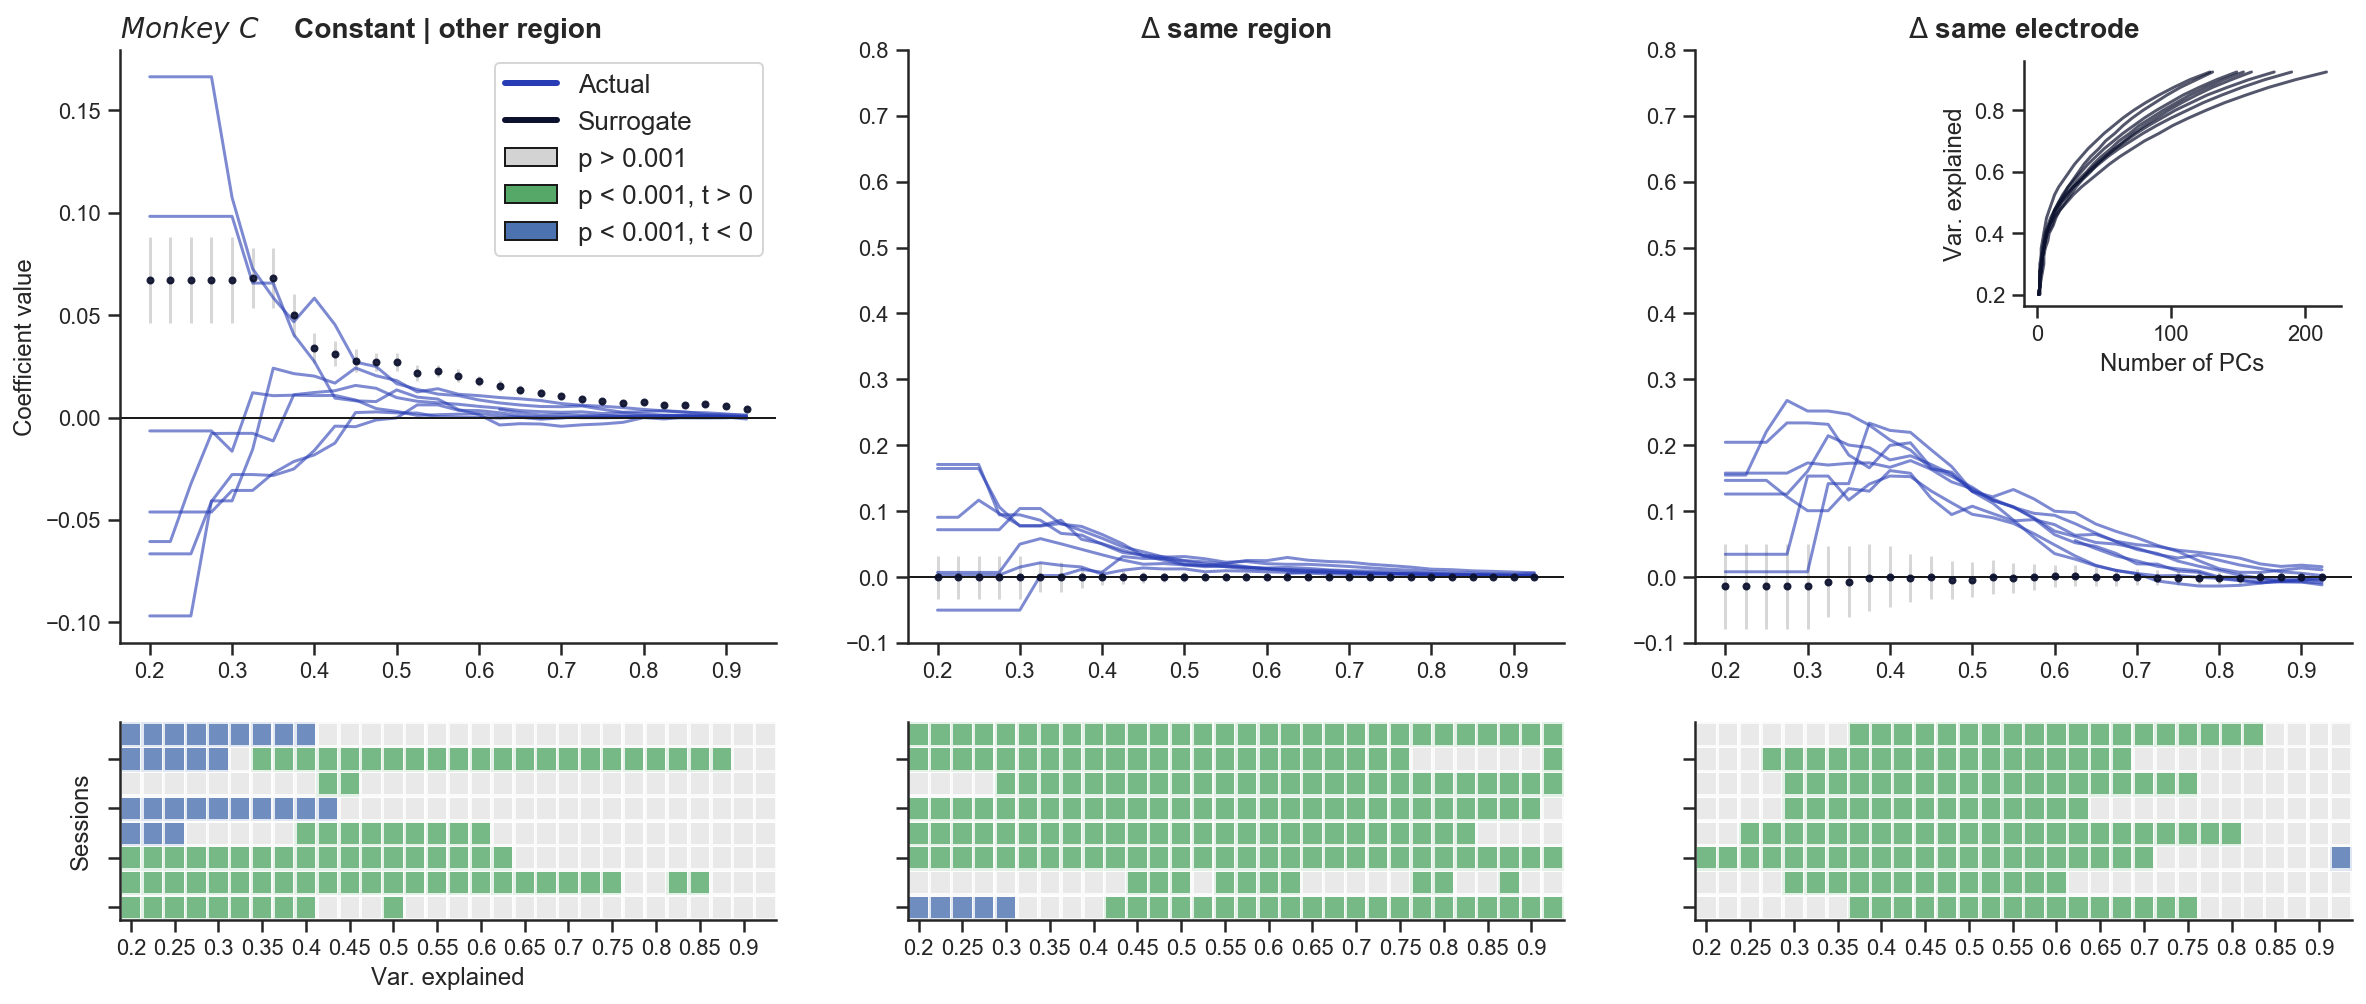

In [14]:
pvals_actual = []
pvals_surr = []
tvals_actual = []
tvals_surr = []

fig, axs = plt.subplots(nrows=2, ncols=3, gridspec_kw={'height_ratios':[3, 1]}, figsize=(20, 8))

axs[0, 0].set_title('$Monkey \,\, C$', loc='left', fontsize=14)

axs[0, 0].errorbar(THRESHOLDS_VARE, b0_mean, b0_std, marker='.', ecolor='lightgray', linestyle='None', color=ddb, alpha=0.9)
axs[0, 1].errorbar(THRESHOLDS_VARE, b1_mean, b1_std, marker='.', ecolor='lightgray', linestyle='None', color=ddb, alpha=0.9)
axs[0, 2].errorbar(THRESHOLDS_VARE, b2_mean, b2_std, marker='.', ecolor='lightgray', linestyle='None', color=ddb, alpha=0.)


for i, s in enumerate(list(main_dict.keys())[:MONKEY_C]):
    
    # Lineplots for each regressor
    axs[0, 0].plot(THRESHOLDS_VARE, [main_dict[s]['vare'][v]['Actual_single_cat'].params[0] for v in main_dict[s]['vare'].keys()], color=db, alpha=0.6)
    axs[0, 0].set_title('Constant | other region', fontweight='bold', fontsize=14)
    axs[0, 0].axhline(0, color='k', lw=1)
    
    axs[0, 1].plot(THRESHOLDS_VARE, [main_dict[s]['vare'][v]['Actual_single_cat'].params[1] for v in main_dict[s]['vare'].keys()], color=db, alpha=0.6)
    axs[0, 1].set_title(r'$\Delta$ same region', fontweight='bold', fontsize=14)
    axs[0, 1].axhline(0, color='k', lw=1)
    
    axs[0, 2].plot(THRESHOLDS_VARE, [main_dict[s]['vare'][v]['Actual_single_cat'].params[2] for v in main_dict[s]['vare'].keys()], color=db, alpha=0.6)
    axs[0, 2].set_title(r'$\Delta$ same electrode', fontweight='bold', fontsize=14)
    axs[0, 2].axhline(0, color='k', lw=1)
    
    pvals_actual.append([main_dict[s]['vare'][v]['Actual_single_cat'].pvalues.values for v in main_dict[s]['vare'].keys()])
    tvals_actual.append([main_dict[s]['vare'][v]['Actual_single_cat'].tvalues.values for v in main_dict[s]['vare'].keys()])
# Convert   
pvals_actual = np.array(pvals_actual)
pvals_surr = np.array(pvals_surr)
tvals_actual = np.array(tvals_actual)
tvals_surr = np.array(tvals_surr)
pvals_actual[np.isnan(pvals_actual)] = 0.001
tvals_actual[np.isnan(tvals_actual)] = 15

# Create inset at the default upper right location
axins = inset_axes(axs[0, 2], width=2.2, height=1.7)
#axins.tick_params(labelleft=False, labelbottom=False)
axins.set_xlabel('Number of PCs')
axins.set_ylabel('Var. explained')
for i, v in enumerate(evar_to_pcs[:MONKEY_C]): axins.plot(v, THRESHOLDS_VARE, '-', color=ddb, alpha=0.7)

# axs[0, 0].set_ylim([-0.1, 0.45])
axs[0, 1].set_ylim([-0.1, 0.8])
axs[0, 2].set_ylim([-0.1, 0.8])

# ======= Prep heatmaps =======
# CONSTANT | OTHER REGION
Pvals_c = pvals_actual[:, :, 0]
Tvals_c = tvals_actual[:, :, 0]

# Set all non significant entries to 0
Pvals_c[np.where(Pvals_c > ALPHA)] = 0
# Set all significant entries where t < 0 to 1 and for t > 0 to 2
Pvals_c[np.where(np.logical_and(Tvals_c < 0, Pvals_c != 0))] = 1
Pvals_c[np.where(np.logical_and(Tvals_c >= 0, Pvals_c != 0))] = 2

# SAME REGION
Pvals_sr = pvals_actual[:, :, 1]
Tvals_sr = tvals_actual[:, :, 1]

# Set all non significant entries to 0
Pvals_sr[np.where(Pvals_sr > ALPHA)] = 0
# Set all significant entries where t < 0 to 1 and for t > 0 to 2
Pvals_sr[np.where(np.logical_and(Tvals_sr < 0, Pvals_sr != 0))] = 1
Pvals_sr[np.where(np.logical_and(Tvals_sr >= 0, Pvals_sr != 0))] = 2

# SAME ELECTRODE
Pvals_se = pvals_actual[:, :, 2]
Tvals_se = tvals_actual[:, :, 2]

# Set all non significant entries to 0
Pvals_se[np.where(Pvals_se > ALPHA)] = 0
# Set all significant entries where t < 0 to 1 and for t > 0 to 2
Pvals_se[np.where(np.logical_and(Tvals_se < 0, Pvals_se != 0))] = 1
Pvals_se[np.where(np.logical_and(Tvals_se >= 0, Pvals_se != 0))] = 2

# ======= Plot heatmaps =======
sns.heatmap(Pvals_c, linewidths=1.3, cmap=cmap, cbar=False, ax=axs[1, 0], alpha=0.8)
axs[1, 0].set_ylim([0, MONKEY_C])
axs[1, 0].set_xticklabels(THRESHOLDS_VARE[::2])
axs[1, 0].set_yticklabels([])
axs[1, 0].set_xlabel('Var. explained')    
axs[1, 0].set_ylabel('Sessions')

sns.heatmap(Pvals_sr, linewidths=1.3, cmap=cmap, cbar=False, ax=axs[1, 1], alpha=0.8)
#sns.heatmap((1 - Pvals_sr) * (1 - 2 * (Tvals_sr < 0)), cmap='bwr', annot=sig_mask_sr, cbar=False, vmin=-1, vmax=1, center=0, ax=axs[1, 1], alpha=0.8)
axs[1, 1].set_ylim([0, MONKEY_C])
axs[1, 1].set_xticklabels(THRESHOLDS_VARE[::2])
axs[1, 1].set_yticklabels([])

sns.heatmap(Pvals_se, linewidths=1.3, cmap=cmap, cbar=False, ax=axs[1, 2], alpha=0.8)
axs[1, 2].set_ylim([0, MONKEY_C])
axs[1, 2].set_xticklabels(THRESHOLDS_VARE[::2])
axs[1, 2].set_yticklabels([])

legend_elements = [Line2D([0], [0], color=db, lw=3, label='Actual'),
                   Line2D([0], [0], color=ddb, lw=3, label=r'Surrogate'),
                   Patch(facecolor='lightgrey', edgecolor='k', label=f'p > {ALPHA}'),
                   Patch(facecolor='g', edgecolor='k', label=f'p < {ALPHA}, t > 0'),
                   Patch(facecolor='b', edgecolor='k', label=f'p < {ALPHA}, t < 0')]
axs[0, 0].legend(handles=legend_elements, prop={'size': 13})
axs[0, 0].set_ylabel('Coefficient value')

sns.despine()

## MONKEY M

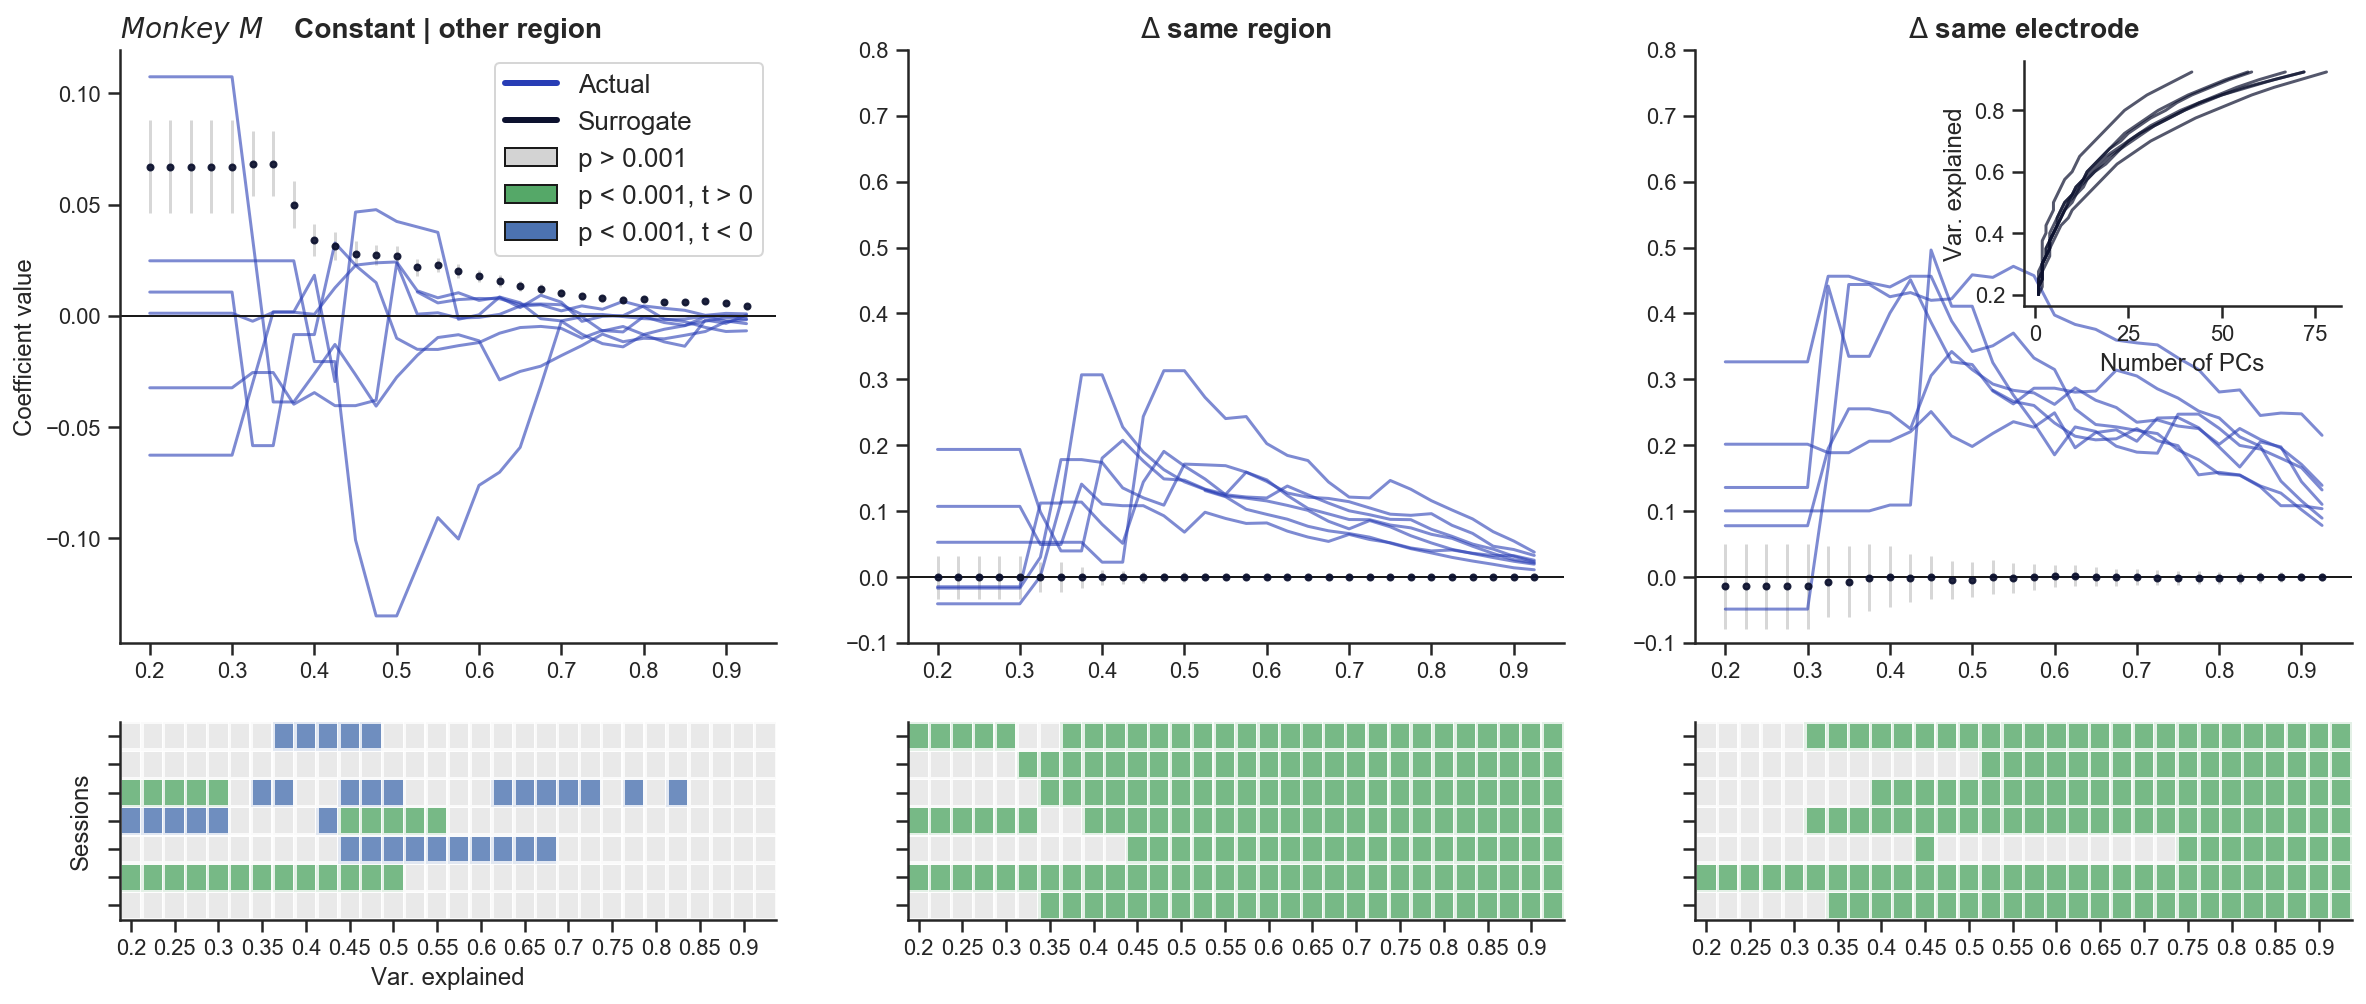

In [17]:
pvals_actual = []
pvals_surr = []
tvals_actual = []
tvals_surr = []

fig, axs = plt.subplots(nrows=2, ncols=3, gridspec_kw={'height_ratios':[3, 1]}, figsize=(20, 8))

axs[0, 0].set_title('$Monkey \,\, M$', loc='left', fontsize=14)

axs[0, 0].errorbar(THRESHOLDS_VARE, b0_mean, b0_std, marker='.', ecolor='lightgray', linestyle='None', color=ddb, alpha=0.9)

axs[0, 1].errorbar(THRESHOLDS_VARE, b1_mean, b1_std, marker='.', ecolor='lightgray', linestyle='None', color=ddb, alpha=0.9)

axs[0, 2].errorbar(THRESHOLDS_VARE, b2_mean, b2_std, marker='.', ecolor='lightgray', linestyle='None', color=ddb, alpha=0.9)
    

for i, s in enumerate(list(main_dict.keys())[MONKEY_C:]):
    
    # Lineplots for each regressor
    axs[0, 0].plot(THRESHOLDS_VARE, [main_dict[s]['vare'][v]['Actual_single_cat'].params[0] for v in main_dict[s]['vare'].keys()], color=db, alpha=0.6)
    axs[0, 0].set_title('Constant | other region', fontweight='bold', fontsize=14)
    axs[0, 0].axhline(0, color='k', lw=1)
    
    axs[0, 1].plot(THRESHOLDS_VARE, [main_dict[s]['vare'][v]['Actual_single_cat'].params[1] for v in main_dict[s]['vare'].keys()], color=db, alpha=0.6)
    axs[0, 1].set_title(r'$\Delta$ same region', fontweight='bold', fontsize=14)
    axs[0, 1].axhline(0, color='k', lw=1)
    
    axs[0, 2].plot(THRESHOLDS_VARE, [main_dict[s]['vare'][v]['Actual_single_cat'].params[2] for v in main_dict[s]['vare'].keys()], color=db, alpha=0.6)
    axs[0, 2].set_title(r'$\Delta$ same electrode', fontweight='bold', fontsize=14)
    axs[0, 2].axhline(0, color='k', lw=1)
    
    pvals_actual.append([main_dict[s]['vare'][v]['Actual_single_cat'].pvalues.values for v in main_dict[s]['vare'].keys()])
    tvals_actual.append([main_dict[s]['vare'][v]['Actual_single_cat'].tvalues.values for v in main_dict[s]['vare'].keys()])
# Convert   
pvals_actual = np.array(pvals_actual)
pvals_surr = np.array(pvals_surr)
tvals_actual = np.array(tvals_actual)
tvals_surr = np.array(tvals_surr)
pvals_actual[np.isnan(pvals_actual)] = 0.001
tvals_actual[np.isnan(tvals_actual)] = 15

# Create inset at the default upper right location
axins = inset_axes(axs[0, 2], width=2.2, height=1.7)
#axins.tick_params(labelleft=False, labelbottom=False)
axins.set_xlabel('Number of PCs')
axins.set_ylabel('Var. explained')
for i, v in enumerate(evar_to_pcs[MONKEY_C:]): axins.plot(v, THRESHOLDS_VARE, '-', color=ddb, alpha=0.7)

# axs[0, 0].set_ylim([-0.1, 0.45])
axs[0, 1].set_ylim([-0.1, 0.8])
axs[0, 2].set_ylim([-0.1, 0.8])

# ======= Prep heatmaps =======
# CONSTANT | OTHER REGION
Pvals_c = pvals_actual[:, :, 0]
Tvals_c = tvals_actual[:, :, 0]

# Set all non significant entries to 0
Pvals_c[np.where(Pvals_c > ALPHA)] = 0
# Set all significant entries where t < 0 to 1 and for t > 0 to 2
Pvals_c[np.where(np.logical_and(Tvals_c < 0, Pvals_c != 0))] = 1
Pvals_c[np.where(np.logical_and(Tvals_c >= 0, Pvals_c != 0))] = 2

# SAME REGION
Pvals_sr = pvals_actual[:, :, 1]
Tvals_sr = tvals_actual[:, :, 1]

# Set all non significant entries to 0
Pvals_sr[np.where(Pvals_sr > ALPHA)] = 0
# Set all significant entries where t < 0 to 1 and for t > 0 to 2
Pvals_sr[np.where(np.logical_and(Tvals_sr < 0, Pvals_sr != 0))] = 1
Pvals_sr[np.where(np.logical_and(Tvals_sr >= 0, Pvals_sr != 0))] = 2

# SAME ELECTRODE
Pvals_se = pvals_actual[:, :, 2]
Tvals_se = tvals_actual[:, :, 2]

# Set all non significant entries to 0
Pvals_se[np.where(Pvals_se > ALPHA)] = 0
# Set all significant entries where t < 0 to 1 and for t > 0 to 2
Pvals_se[np.where(np.logical_and(Tvals_se < 0, Pvals_se != 0))] = 1
Pvals_se[np.where(np.logical_and(Tvals_se >= 0, Pvals_se != 0))] = 2

# ======= Plot heatmaps =======
sns.heatmap(Pvals_c, linewidths=1.3, cmap=cmap, cbar=False, ax=axs[1, 0], alpha=0.8)
axs[1, 0].set_ylim([0, MONKEY_M])
axs[1, 0].set_xticklabels(THRESHOLDS_VARE[::2])
axs[1, 0].set_yticklabels([])
axs[1, 0].set_xlabel('Var. explained')    
axs[1, 0].set_ylabel('Sessions')

sns.heatmap(Pvals_sr, linewidths=1.3, cmap=cmap, cbar=False, ax=axs[1, 1], alpha=0.8)
#sns.heatmap((1 - Pvals_sr) * (1 - 2 * (Tvals_sr < 0)), cmap='bwr', annot=sig_mask_sr, cbar=False, vmin=-1, vmax=1, center=0, ax=axs[1, 1], alpha=0.8)
axs[1, 1].set_ylim([0, MONKEY_M])
axs[1, 1].set_xticklabels(THRESHOLDS_VARE[::2])
axs[1, 1].set_yticklabels([])

sns.heatmap(Pvals_se, linewidths=1.3, cmap=cmap, cbar=False, ax=axs[1, 2], alpha=0.8)
axs[1, 2].set_ylim([0, MONKEY_M])
axs[1, 2].set_xticklabels(THRESHOLDS_VARE[::2])
axs[1, 2].set_yticklabels([])

legend_elements = [Line2D([0], [0], color=db, lw=3, label='Actual'),
                   Line2D([0], [0], color=ddb, lw=3, label=r'Surrogate'),
                   Patch(facecolor='lightgrey', edgecolor='k', label=f'p > {ALPHA}'),
                   Patch(facecolor='g', edgecolor='k', label=f'p < {ALPHA}, t > 0'),
                   Patch(facecolor='b', edgecolor='k', label=f'p < {ALPHA}, t < 0')]
axs[0, 0].legend(handles=legend_elements, prop={'size': 13})
axs[0, 0].set_ylabel('Coefficient value')

sns.despine()

## Check surrogates

In [38]:
cmap = matplotlib.colors.ListedColormap(['lightgrey', 'g']) # Color for False and True

In [29]:
Pvals_surr_noTME = np.load('pvals_surr.npy')
Tvals_surr_noTME = np.load('tvals_surr.npy')

In [32]:
Pvals_surr_noTME[:, :, 2]

array([[0.38782887, 0.38782887, 0.38782887, ..., 0.6807737 , 0.5560076 ,
        0.09828925],
       [0.84106434, 0.84106434, 0.84106434, ..., 0.26165057, 0.67145894,
        0.57793669],
       [0.49081168, 0.49081168, 0.49081168, ..., 0.59309692, 0.56952236,
        0.81432476],
       ...,
       [0.09421907, 0.09421907, 0.09421907, ..., 0.00524163, 0.03362028,
        0.15162436],
       [0.68651985, 0.68651985, 0.68651985, ..., 0.22353736, 0.90364455,
        0.31958083],
       [0.2435178 , 0.2435178 , 0.2435178 , ..., 0.38678015, 0.21588995,
        0.14828559]])

In [34]:
Tvals_surr_noTME[:, :, 2]

array([[-0.86357734, -0.86357734, -0.86357734, ...,  0.41141266,
        -0.58879027, -1.65326973],
       [ 0.20053445,  0.20053445,  0.20053445, ...,  1.12252526,
         0.42415184,  0.5564088 ],
       [-0.68902916, -0.68902916, -0.68902916, ...,  0.53436085,
         0.56876304, -0.23485314],
       ...,
       [-1.67361724, -1.67361724, -1.67361724, ..., -2.79205602,
        -2.12472049, -1.43386379],
       [ 0.40358733,  0.40358733,  0.40358733, ..., -1.21720765,
        -0.12105999, -0.99534058],
       [ 1.16626816,  1.16626816,  1.16626816, ...,  0.86548732,
         1.23756428,  1.44566089]])

In [21]:
Tvals_surr_noTME.shape

(50, 30, 3)

In [22]:
Pvals_surr_noTME.shape

(50, 30, 3)

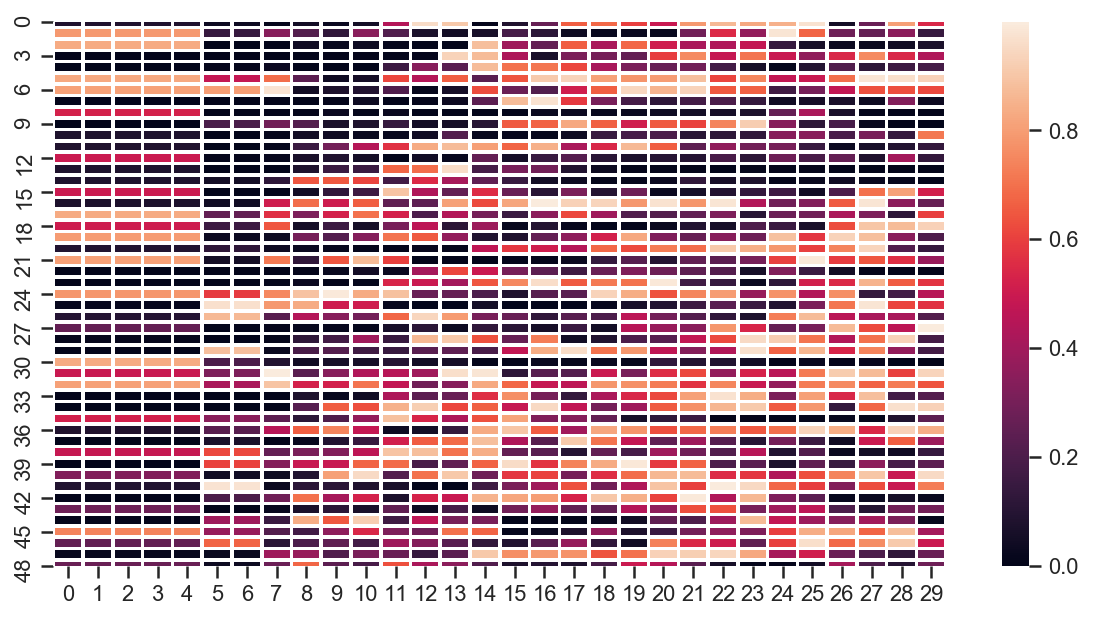

In [55]:
sns.heatmap(Pvals_surr_noTME[:, :, 1], linewidth=1.3);

In [58]:
boolean = Pvals_surr_noTME[:, :, 0] < 0.001

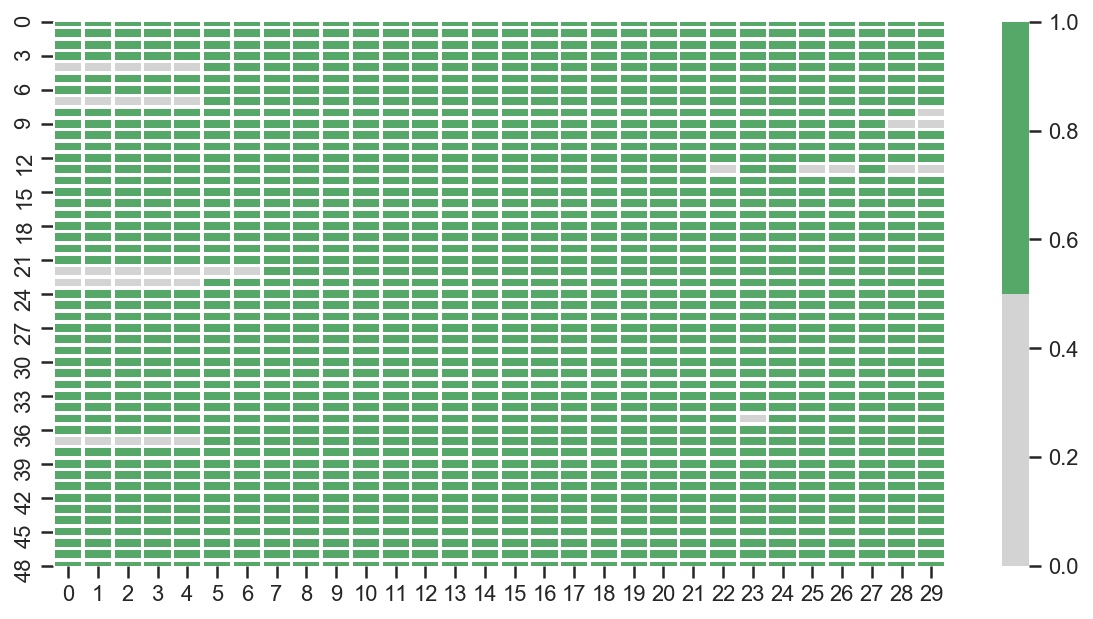

In [59]:
sns.heatmap(boolean, linewidth=1.3, cmap=matplotlib.colors.ListedColormap(['lightgrey', 'g']), vmin=0, vmax=1);

In [23]:
ALPHA = 0.001

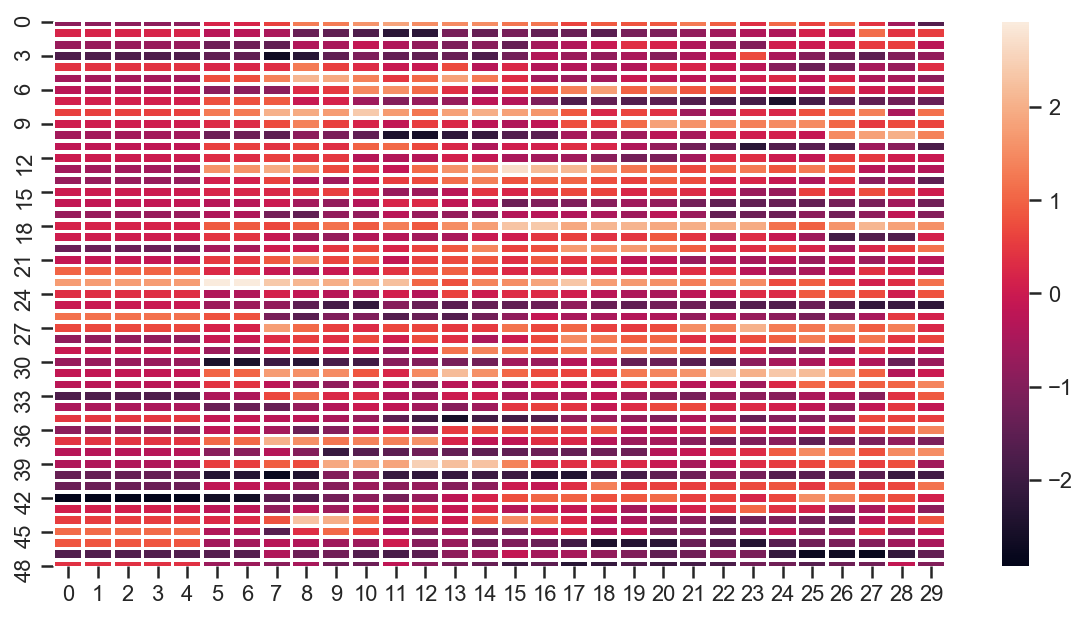

In [35]:
sns.heatmap(Tvals_surr_noTME[:, :, 2], linewidth=1.3);

In [ ]:
sns.heatmap(Pvals_surr_noTME[:, :, 1] < ALPHA , linewidth=1.3);

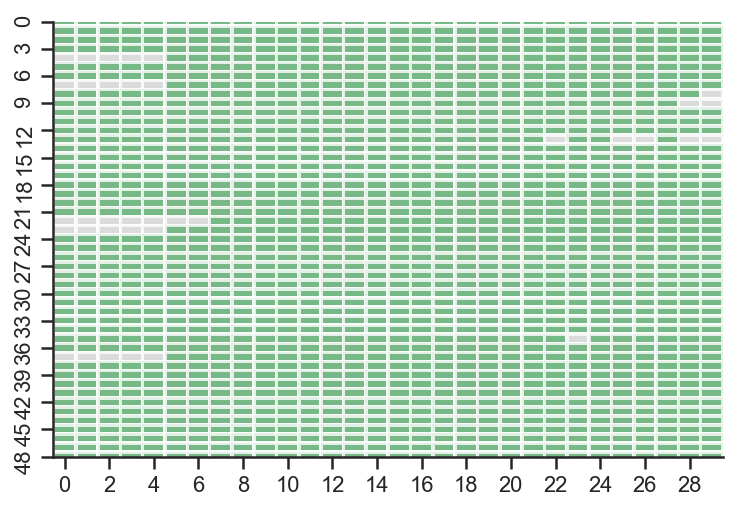

In [37]:
#sns.set(rc={'figure.figsize':(10, 3)})

# CONSTANT | OTHER REGION
Pvals_surr = Pvals_surr_noTME[:, :, 0]
Tvals_surr = Tvals_surr_noTME[:, :, 0]

# Set all non significant entries to 0
Pvals_surr[np.where(Pvals_surr > ALPHA)] = 0
# Set all significant entries where t < 0 to 1 and for t > 0 to 2
Pvals_surr[np.where(np.logical_and(Tvals_surr < 0, Pvals_surr != 0))] = 1
Pvals_surr[np.where(np.logical_and(Tvals_surr >= 0, Pvals_surr != 0))] = 2

# ======= Plot heatmaps =======
sns.heatmap(Pvals_surr, linewidths=1.3, cmap=cmap, cbar=False, alpha=0.8)
#plt.ylim([0, 50])

sns.despine()

In [38]:
pvals_surr.shape

(20, 30, 3)

In [36]:
pvals_surr[:, :, 0].shape

(20, 30)

(0, 20)

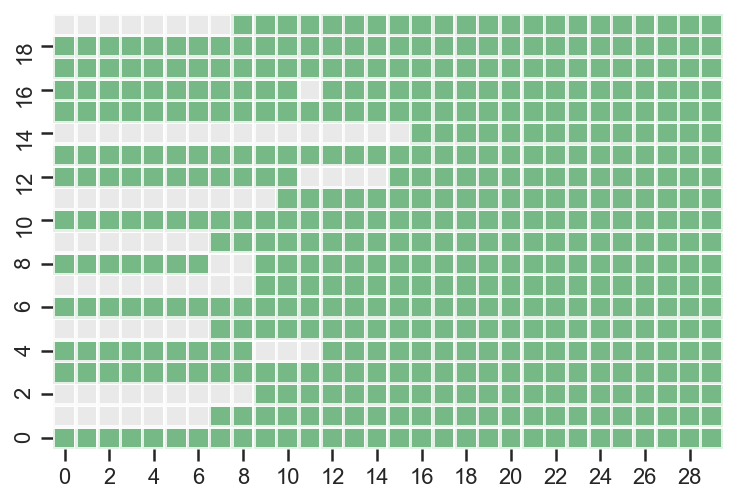

In [40]:
sns.heatmap(pvals_surr[:, :, 0] < 0.001, cmap=cmap, linewidths=1.3, cbar=False, alpha=0.8)
plt.ylim([0, 20])

(0, 20)

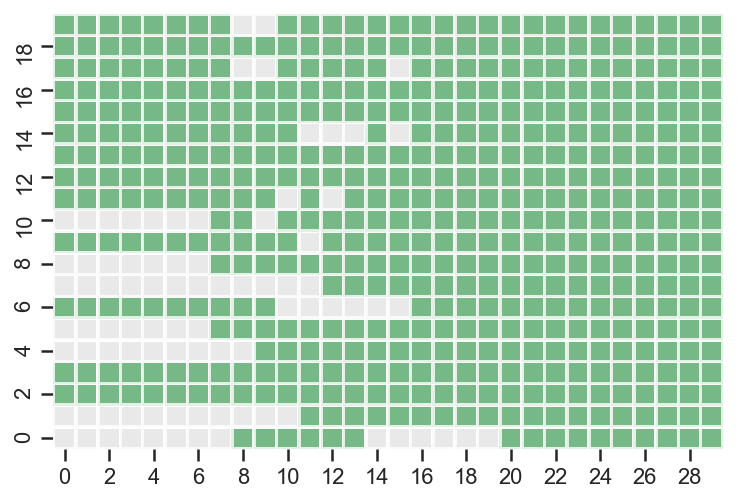

In [13]:
sns.heatmap(pvals_surr[:, :, 1] < 0.01, cmap=cmap, linewidths=1.3, cbar=False, alpha=0.8)
plt.ylim([0, 20])

(0, 20)

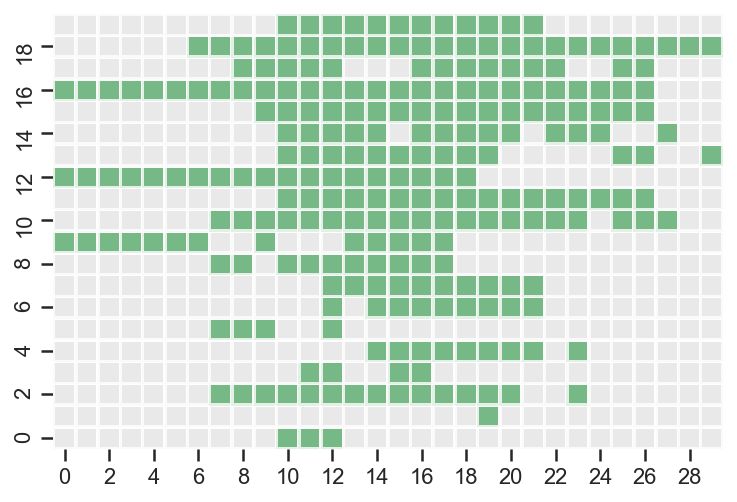

In [14]:
sns.heatmap(pvals_surr[:, :, 2] < 0.01, cmap=cmap, linewidths=1.3, cbar=False, alpha=0.8)
plt.ylim([0, 20])

### 1.2 Within 

In [11]:
main_dict[s]['vare']['0.2']['Actual_within_separate'].params

M1 Constant            0.009123
M1 SE (d = 0)          0.046433
M1 d in (0.0, 2.0]    -0.001113
M1 d in (0.0, 4.0]     0.030750
OA Constant           -0.066579
PMd Constant           0.135762
PMd SE (d = 0)        -0.048042
PMd d in (0.0, 2.0]    0.010465
PMd d in (0.0, 4.0]   -0.049197
dtype: float64

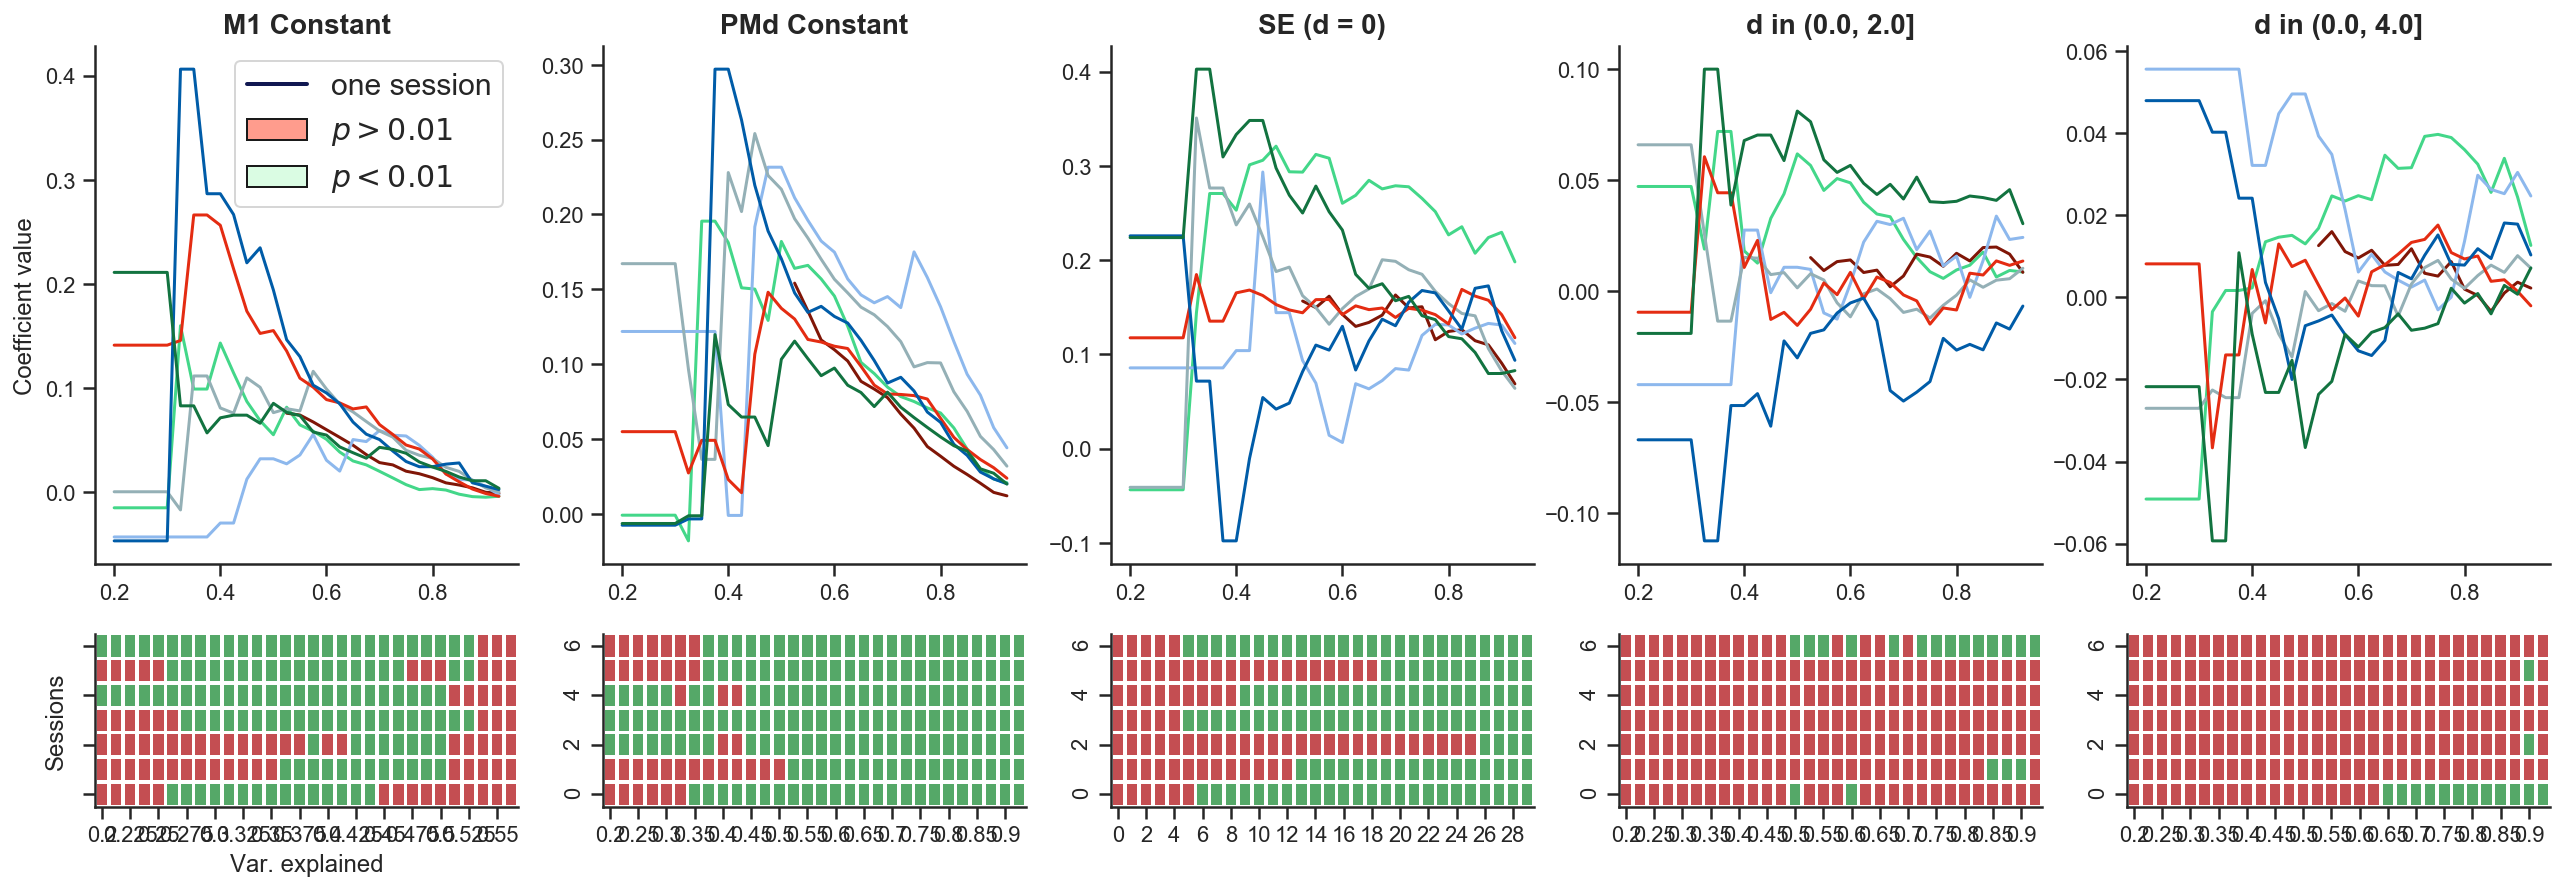

In [12]:
titles = main_dict[s]['vare']['0.2']['Actual_within'].params.keys()
pvals = []

fig, axs = plt.subplots(nrows=2, ncols=5, gridspec_kw={'height_ratios':[3, 1]}, figsize=(22, 7))

for i, s in enumerate(list(main_dict.keys())[MONKEY_C:]):
    
    # Lineplots for each regressor
    axs[0, 0].plot(THRESHOLDS_VARE, [main_dict[s]['vare'][v]['Actual_within'].params[0] for v in main_dict[s]['vare'].keys()], color=cs[i])
    axs[0, 0].set_title(f'{titles[0]}', fontweight='bold', fontsize=14)
    
    axs[0, 1].plot(THRESHOLDS_VARE, [main_dict[s]['vare'][v]['Actual_within'].params[2] for v in main_dict[s]['vare'].keys()], color=cs[i])
    axs[0, 1].set_title(f'{titles[2]}', fontweight='bold', fontsize=14)

    axs[0, 2].plot(THRESHOLDS_VARE, [main_dict[s]['vare'][v]['Actual_within'].params[3] for v in main_dict[s]['vare'].keys()], color=cs[i])
    axs[0, 2].set_title(f'{titles[3]}', fontweight='bold', fontsize=14)
    
    axs[0, 3].plot(THRESHOLDS_VARE, [main_dict[s]['vare'][v]['Actual_within'].params[4] for v in main_dict[s]['vare'].keys()], color=cs[i])
    axs[0, 3].set_title(f'{titles[4]}', fontweight='bold', fontsize=14)
    
    axs[0, 4].plot(THRESHOLDS_VARE, [main_dict[s]['vare'][v]['Actual_within'].params[5] for v in main_dict[s]['vare'].keys()], color=cs[i])
    axs[0, 4].set_title(f'{titles[5]}', fontweight='bold', fontsize=14)
    
    pvals.append([main_dict[s]['vare'][v]['Actual_within'].pvalues.values for v in main_dict[s]['vare'].keys()])

pvals = np.array(pvals)

# Heatmaps for respective p values
sns.heatmap(pvals[:, :, 0] < 0.01, cmap=cmap, linewidths=1.3, cbar=False, ax=axs[1, 0])
axs[1, 0].set_ylim([0, MONKEY_M])
axs[1, 0].set_xticklabels(THRESHOLDS_VARE)
axs[1, 0].set_yticklabels([])
axs[1, 0].set_xlabel('Var. explained')    
axs[1, 0].set_ylabel('Sessions')

sns.heatmap(pvals[:, :, 2] < 0.01, cmap=cmap, linewidths=1.3, cbar=False, ax=axs[1, 1])
axs[1, 1].set_ylim([0, MONKEY_M])
axs[1, 1].set_xticklabels(THRESHOLDS_VARE[::2])

sns.heatmap(pvals[:, :, 3] < 0.01, cmap=cmap, linewidths=1.3, cbar=False, ax=axs[1, 2])
axs[1, 2].set_ylim([0, MONKEY_M])
axs[1, 3].set_xticklabels(THRESHOLDS_VARE[::2])

sns.heatmap(pvals[:, :, 4] < 0.01, cmap=cmap, linewidths=1.3, cbar=False, ax=axs[1, 3])
axs[1, 3].set_ylim([0, MONKEY_M])
axs[1, 3].set_xticklabels(THRESHOLDS_VARE[::2])

sns.heatmap(pvals[:, :, 5] < 0.01, cmap=cmap, linewidths=1.3, cbar=False, ax=axs[1, 4])
axs[1, 4].set_ylim([0, MONKEY_M])
axs[1, 4].set_xticklabels(THRESHOLDS_VARE[::2])

legend_elements = [Line2D([0], [0], color=cs[7], lw=2, label='one session'),
                   Patch(facecolor='#ff9c8d', edgecolor='k', label=r'$p > 0.01$'),
                   Patch(facecolor='#dafce3', edgecolor='k', label=r'$p < 0.01$'),]
axs[0, 0].legend(handles=legend_elements, prop={'size': 15})
axs[0, 0].set_ylabel('Coefficient value')

sns.despine()

### 1.3 Within intervals separate

In [37]:
main_dict[s]['vare']['0.2']['Actual_within_separate'].params

M1 Constant            0.093333
M1 SE (d = 0)          0.295556
M1 d in (0.0, 2.0]    -0.094915
M1 d in (0.0, 4.0]     0.141116
OA Constant            0.091206
PMd Constant           0.046726
PMd SE (d = 0)         0.146257
PMd d in (0.0, 2.0]   -0.013226
PMd d in (0.0, 4.0]    0.000164
dtype: float64

In [38]:
main_dict[s]['vare']['0.2']['Actual_within_separate'].params[2]

0.2955555555555552

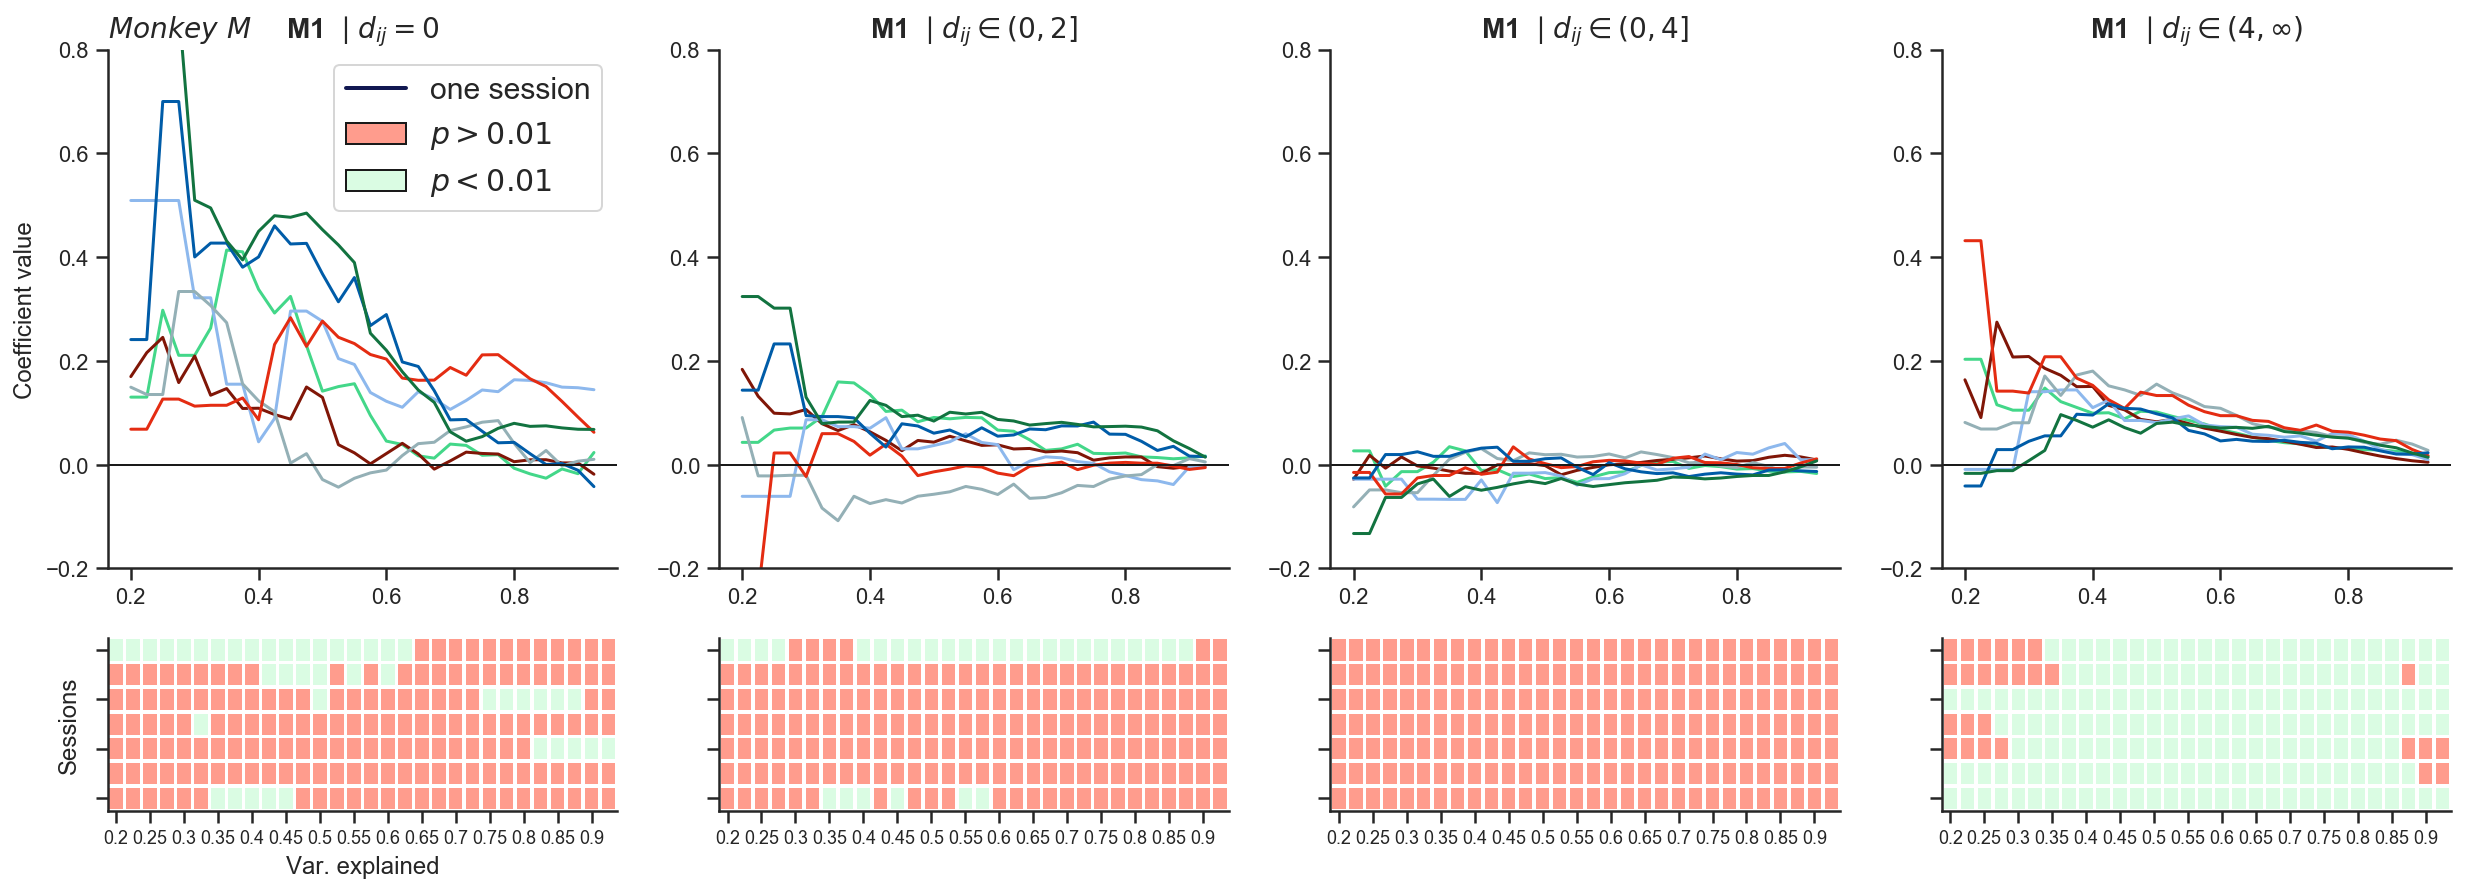

In [159]:
titles = main_dict[s]['vare']['0.2']['Actual_within_separate'].params.keys()
pvals = []

fig, axs = plt.subplots(nrows=2, ncols=4, gridspec_kw={'height_ratios':[3, 1]}, figsize=(21, 7))

for i, s in enumerate(list(main_dict.keys())[MONKEY_C:]):
    
    # Lineplots for each regressor
    axs[0, 0].plot(THRESHOLDS_VARE, [main_dict[s]['vare'][v]['Actual_within_separate'].params[1] for v in main_dict[s]['vare'].keys()], color=cs[i])
    axs[0, 0].set_title(f'{titles[0]}', fontweight='bold', fontsize=14)
    
    axs[0, 1].plot(THRESHOLDS_VARE, [main_dict[s]['vare'][v]['Actual_within_separate'].params[2] for v in main_dict[s]['vare'].keys()], color=cs[i])
    axs[0, 1].set_title(f'{titles[1]}', fontweight='bold', fontsize=14)

    axs[0, 2].plot(THRESHOLDS_VARE, [main_dict[s]['vare'][v]['Actual_within_separate'].params[3] for v in main_dict[s]['vare'].keys()], color=cs[i])
    axs[0, 2].set_title(f'{titles[2]}', fontweight='bold', fontsize=14)
    
    axs[0, 3].plot(THRESHOLDS_VARE, [main_dict[s]['vare'][v]['Actual_within_separate'].params[0] for v in main_dict[s]['vare'].keys()], color=cs[i])
    axs[0, 3].set_title(f'{titles[3]}', fontweight='bold', fontsize=14)
    
    pvals.append([main_dict[s]['vare'][v]['Actual_within_separate'].pvalues.values for v in main_dict[s]['vare'].keys()])

pvals = np.array(pvals)
axs[0, 0].set_title(r'M1 $\mid d_{ij} = 0$', fontweight='bold', fontsize=14)
axs[0, 0].set_title('$Monkey \,\, M$', loc='left', fontsize=14)
axs[0, 0].set_ylim([-0.2, 0.8])
axs[0, 0].axhline(0, color='k', lw=1)

axs[0, 1].set_title(r'M1 $\mid d_{ij} \in (0, 2]$', fontweight='bold', fontsize=14)
axs[0, 1].set_ylim([-0.2, 0.8])
axs[0, 1].axhline(0, color='k', lw=1)

axs[0, 2].set_title(r'M1 $\mid d_{ij} \in (0, 4]$', fontweight='bold', fontsize=14)
axs[0, 2].set_ylim([-0.2, 0.8])
axs[0, 2].axhline(0, color='k', lw=1)

axs[0, 3].set_title('M1 $\mid d_{ij} \in (4, \infty)$', fontweight='bold', fontsize=14)
axs[0, 3].set_ylim([-0.2, 0.8])
axs[0, 3].axhline(0, color='k', lw=1)

# Heatmaps for respective p values
sns.heatmap(pvals[:, :, 1] < 0.01, cmap=cmap, linewidths=1.3, cbar=False, ax=axs[1, 0])
axs[1, 0].set_ylim([0, MONKEY_M])
axs[1, 0].set_xticklabels(THRESHOLDS_VARE[::2], fontsize=9)
axs[1, 0].set_yticklabels([])
axs[1, 0].set_xlabel('Var. explained')    
axs[1, 0].set_ylabel('Sessions')

sns.heatmap(pvals[:, :, 2] < 0.01, cmap=cmap, linewidths=1.3, cbar=False, ax=axs[1, 1])
axs[1, 1].set_ylim([0, MONKEY_M])
axs[1, 1].set_xticklabels(THRESHOLDS_VARE[::2], fontsize=9)
axs[1, 1].set_yticklabels([])

sns.heatmap(pvals[:, :, 3] < 0.01, cmap=cmap, linewidths=1.3, cbar=False, ax=axs[1, 2])
axs[1, 2].set_ylim([0, MONKEY_M])
axs[1, 2].set_xticklabels(THRESHOLDS_VARE[::2], fontsize=9)
axs[1, 2].set_yticklabels([])

sns.heatmap(pvals[:, :, 0] < 0.01, cmap=cmap, linewidths=1.3, cbar=False, ax=axs[1, 3])
axs[1, 3].set_ylim([0, MONKEY_M])
axs[1, 3].set_xticklabels(THRESHOLDS_VARE[::2], fontsize=9)
axs[1, 3].set_yticklabels([])

legend_elements = [Line2D([0], [0], color=cs[7], lw=2, label='one session'),
                   Patch(facecolor='#ff9c8d', edgecolor='k', label=r'$p > 0.01$'),
                   Patch(facecolor='#dafce3', edgecolor='k', label=r'$p < 0.01$'),]
axs[0, 0].legend(handles=legend_elements, prop={'size': 15})
axs[0, 0].set_ylabel('Coefficient value')

sns.despine()

### PMd

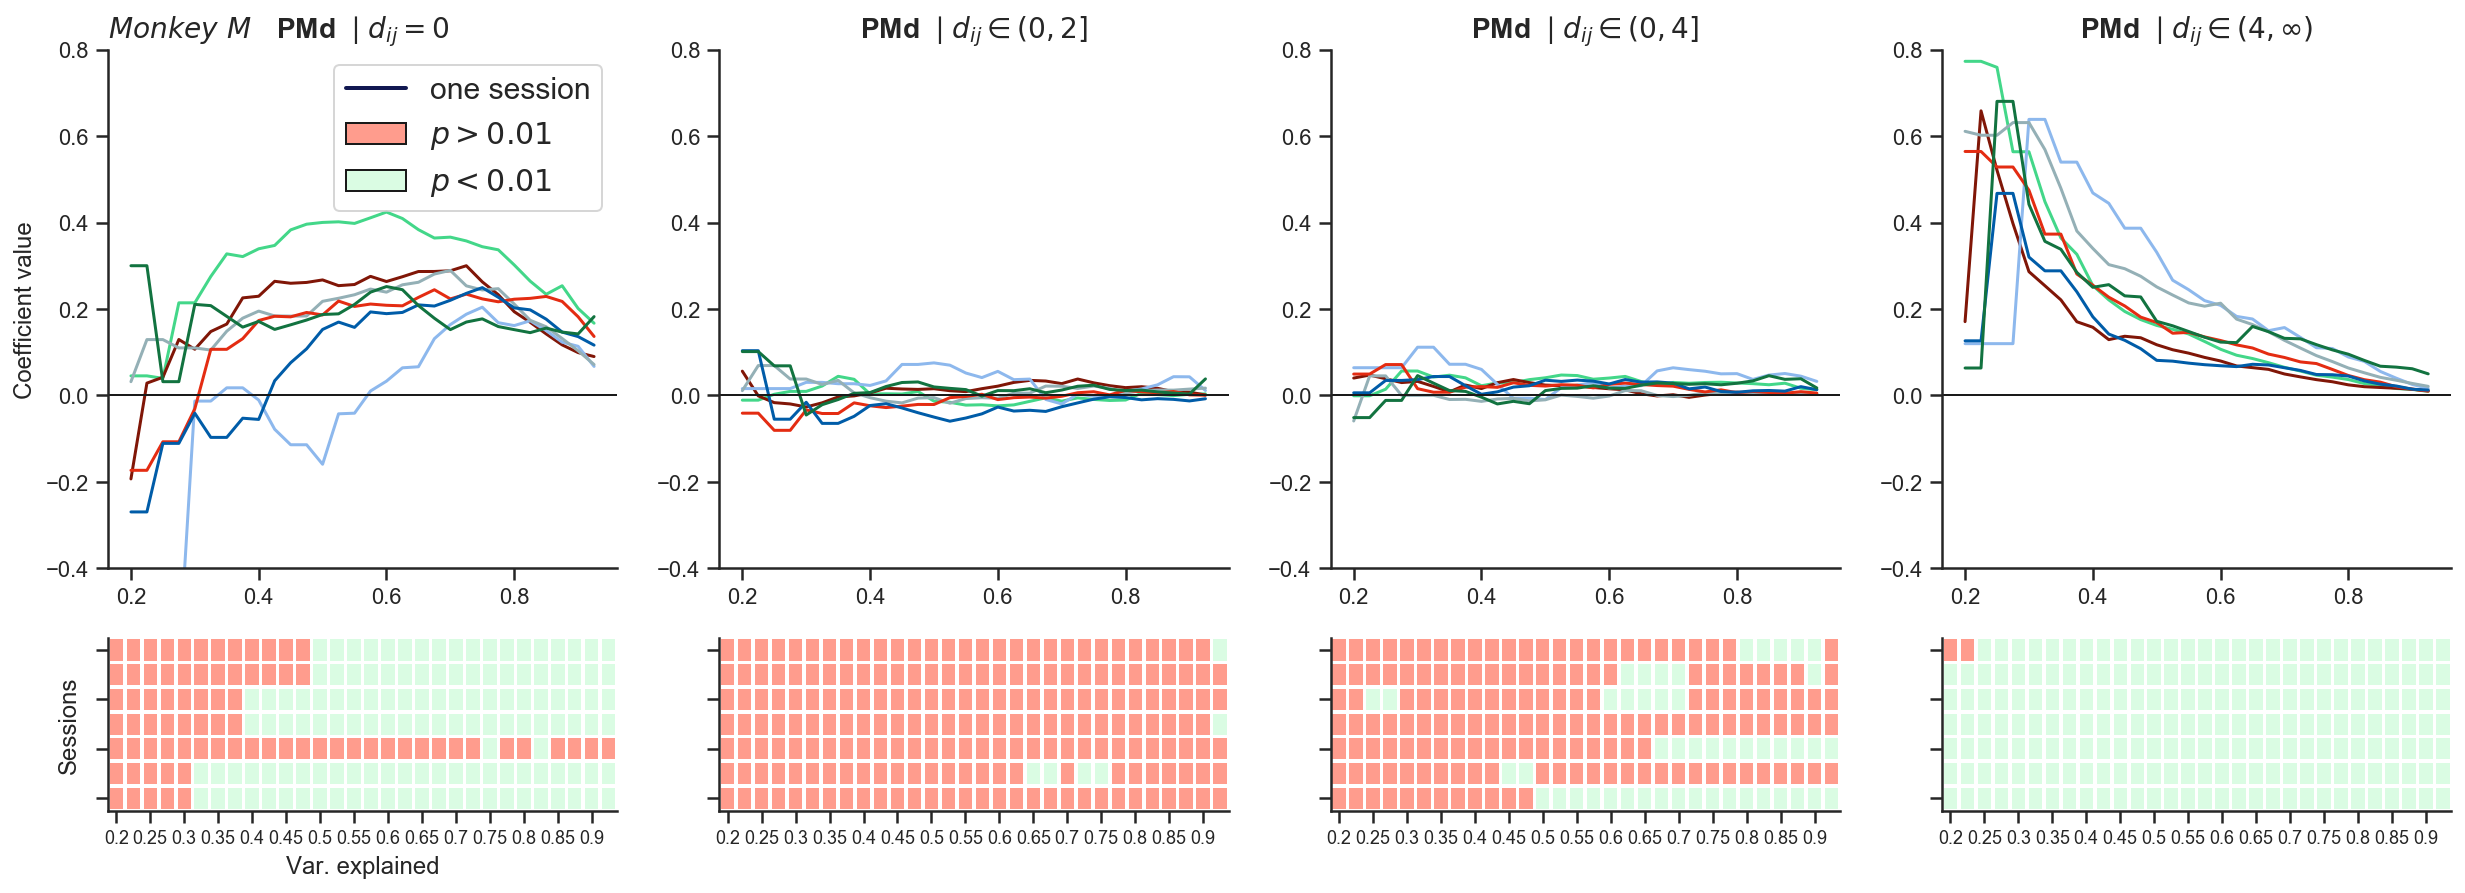

In [161]:
titles = main_dict[s]['vare']['0.2']['Actual_within_separate'].params.keys()
pvals = []

fig, axs = plt.subplots(nrows=2, ncols=4, gridspec_kw={'height_ratios':[3, 1]}, figsize=(21, 7))

for i, s in enumerate(list(main_dict.keys())[MONKEY_C:]):
    
    # Lineplots for each regressor
    axs[0, 0].plot(THRESHOLDS_VARE, [main_dict[s]['vare'][v]['Actual_within_separate'].params[6] for v in main_dict[s]['vare'].keys()], color=cs[i])
    axs[0, 0].set_title(f'{titles[0]}', fontweight='bold', fontsize=14)
    
    axs[0, 1].plot(THRESHOLDS_VARE, [main_dict[s]['vare'][v]['Actual_within_separate'].params[7] for v in main_dict[s]['vare'].keys()], color=cs[i])
    axs[0, 1].set_title(f'{titles[1]}', fontweight='bold', fontsize=14)

    axs[0, 2].plot(THRESHOLDS_VARE, [main_dict[s]['vare'][v]['Actual_within_separate'].params[8] for v in main_dict[s]['vare'].keys()], color=cs[i])
    axs[0, 2].set_title(f'{titles[2]}', fontweight='bold', fontsize=14)
    
    axs[0, 3].plot(THRESHOLDS_VARE, [main_dict[s]['vare'][v]['Actual_within_separate'].params[5] for v in main_dict[s]['vare'].keys()], color=cs[i])
    axs[0, 3].set_title(f'{titles[3]}', fontweight='bold', fontsize=14)
    
    pvals.append([main_dict[s]['vare'][v]['Actual_within_separate'].pvalues.values for v in main_dict[s]['vare'].keys()])

pvals = np.array(pvals)
axs[0, 0].set_title(r'PMd $\mid d_{ij} = 0$', fontweight='bold', fontsize=14)
axs[0, 0].set_title('$Monkey \,\, M$', loc='left', fontsize=14)
axs[0, 0].set_ylim([-0.4, 0.8])
axs[0, 0].axhline(0, color='k', lw=1)

axs[0, 1].set_title(r'PMd $\mid d_{ij} \in (0, 2]$', fontweight='bold', fontsize=14)
axs[0, 1].set_ylim([-0.4, 0.8])
axs[0, 1].axhline(0, color='k', lw=1)

axs[0, 2].set_title(r'PMd $\mid d_{ij} \in (0, 4]$', fontweight='bold', fontsize=14)
axs[0, 2].set_ylim([-0.4, 0.8])
axs[0, 2].axhline(0, color='k', lw=1)

axs[0, 3].set_title('PMd $\mid d_{ij} \in (4, \infty)$', fontweight='bold', fontsize=14)
axs[0, 3].set_ylim([-0.4, 0.8])
axs[0, 3].axhline(0, color='k', lw=1)

# Heatmaps for respective p values
sns.heatmap(pvals[:, :, 6] < 0.01, cmap=cmap, linewidths=1.3, cbar=False, ax=axs[1, 0])
axs[1, 0].set_ylim([0, MONKEY_M])
axs[1, 0].set_xticklabels(THRESHOLDS_VARE[::2], fontsize=9)
axs[1, 0].set_yticklabels([])
axs[1, 0].set_xlabel('Var. explained')    
axs[1, 0].set_ylabel('Sessions')

sns.heatmap(pvals[:, :, 7] < 0.01, cmap=cmap, linewidths=1.3, cbar=False, ax=axs[1, 1])
axs[1, 1].set_ylim([0, MONKEY_M])
axs[1, 1].set_xticklabels(THRESHOLDS_VARE[::2], fontsize=9)
axs[1, 1].set_yticklabels([])

sns.heatmap(pvals[:, :, 8] < 0.01, cmap=cmap, linewidths=1.3, cbar=False, ax=axs[1, 2])
axs[1, 2].set_ylim([0, MONKEY_M])
axs[1, 2].set_xticklabels(THRESHOLDS_VARE[::2], fontsize=9)
axs[1, 2].set_yticklabels([])

sns.heatmap(pvals[:, :, 5] < 0.01, cmap=cmap, linewidths=1.3, cbar=False, ax=axs[1, 3])
axs[1, 3].set_ylim([0, MONKEY_M])
axs[1, 3].set_xticklabels(THRESHOLDS_VARE[::2], fontsize=9)
axs[1, 3].set_yticklabels([])

legend_elements = [Line2D([0], [0], color=cs[7], lw=2, label='one session'),
                   Patch(facecolor='#ff9c8d', edgecolor='k', label=r'$p > 0.01$'),
                   Patch(facecolor='#dafce3', edgecolor='k', label=r'$p < 0.01$'),]
axs[0, 0].legend(handles=legend_elements, prop={'size': 15})
axs[0, 0].set_ylabel('Coefficient value')

sns.despine()

## 2 Make violin plots

In [1]:
# ''' Concatenate surrogate and real data dfs, make violins '''

# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#69A5FF', '#DCDFE3'])
# plt.rcParams['axes.labelsize'] = 16

# for s in main_dict.keys(): # for all sessions
    
#     print(sessions[s])
    
#     df_emp_and_surr = pd.concat([sessions_dfs[s], sessions_dfs_surr[s]])
#     fig, axs = plt.subplots(1, 2, figsize=(17, 6))

#     sns.violinplot(x='category', y='correlation', hue='Type', data=df_emp_and_control, inner='quartile', 
#                 split=True, order=['same electrode', 'same array', 'other array'], legend=False, ax=axs[0])

#     sns.violinplot(x='within distance', y='correlation', hue='Type', data=df_emp_and_control, inner='quartile',
#                 split=True, order=['0', '(0, 2]','(2, 4]', '(4, inf)'], ax=axs[1], legend=True)

#     axs[0].set_ylim=(-1, 1.1)
#     axs[0].get_legend().remove()
#     axs[0].set_ylabel(r'$\rho$')
#     axs[1].set_ylim=(-1, 1.1)
#     axs[1].set_ylabel(r'$\rho$')
#     axs[1].legend(bbox_to_anchor=(1.3, 1))

#     # Make means different color
#     for l in axs[0].lines[1::3]:
#         l.set_linewidth(1.3)
#         l.set_color('#000000')

#     for l in axs[1].lines[1::3]:
#         l.set_linewidth(1.3)
#         l.set_color('#000000')
#     sns.despine(), plt.show()